# Timeseries

This IPython notebook shows some plots of timeseries from the timeseries dataset. In this dataset, we measured the population composition of a number of different bacterial populations over time. 

In [82]:
%pylab inline
import pandas as pd

rc("xtick", labelsize='large')
rc("ytick", labelsize='large')
rc("legend", fontsize='medium', numpoints=1, frameon=False)
rc('lines', linewidth=2, markersize=8)
rc('axes', linewidth=1.1, labelsize='x-large', titlesize='x-large')

Populating the interactive namespace from numpy and matplotlib


In [83]:
data = pd.read_csv('./data/timetraces.csv')

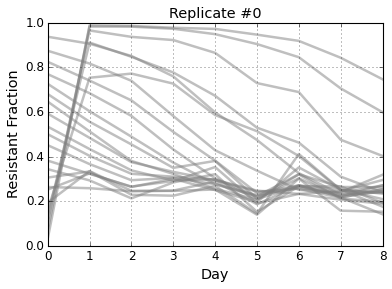

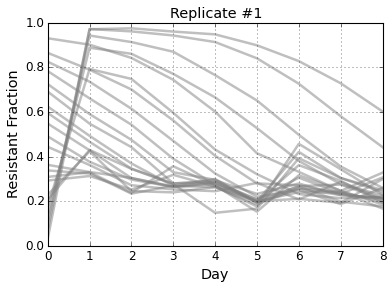

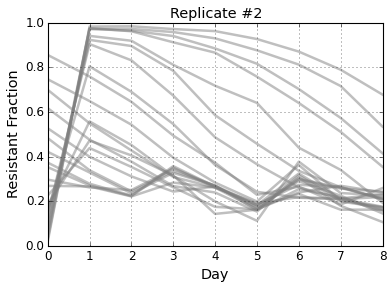

In [84]:
for replicate in [0, 1, 2]:
    fig = figure()
    ax = subplot(111)
    filtered_data = data[data.replicate == replicate]
    
    for label, time_series in filtered_data.groupby(data.culture_id):
        time_series.plot(x='day', y='ff', ax=ax, kind='line', 
                         legend=False, color='gray', alpha=0.5, linewidth=2.5);
    ylabel('Resistant Fraction')
    xlabel('Day')
    title('Replicate #{}'.format(replicate))

# Figure 1A

Partial reproduction of Figure 1A data

In [95]:
fig1A_data = data.query('culture_id in (25, 37, 41)').pivot('day', 'culture_id', 'ff')

fig1A_data

culture_id,25,37,41
day,,,
0,0.101747,0.595014,0.782776
1,0.942113,0.466028,0.660489
2,0.912840,0.345802,0.542458
3,0.869435,0.279355,0.389994
4,0.764689,0.293026,0.273163
5,0.650914,0.232652,0.199638
6,0.497155,0.278977,0.210429
7,0.355295,0.227260,0.192887
8,0.259705,0.215370,0.298756


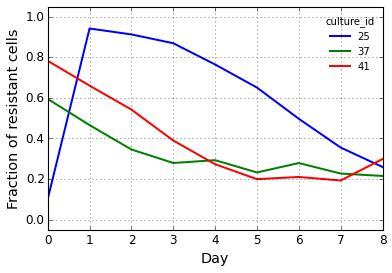

In [96]:
fig1A_data.plot()
ylabel('Fraction of resistant cells')
ylim(-0.05, 1.05)
xlabel('Day')

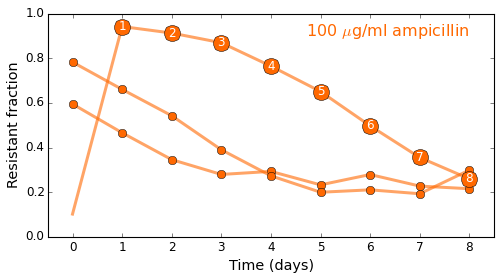

In [92]:
color = cm.jet(0.8)

def generate_figure_1A(data, trace_to_annotate=None):
    """ Creates Figure 1A from the time series data. 
    
    Parameters
    ---------------
   
    data : DataFrame
    
    trace_to_annotate : column to annotate
        Specifies which column of the data to use for annotation.
    """
    
    annotated_marker = {'color' : color, 'markersize' : 8, 'mec' : 'k', 'marker' : 'None'}
    non_annotated_marker = {'color' : color, 'markersize' : 8, 'mec' : 'k', 'marker' : 'o'}
    
    days = data.index

    for i, trace in enumerate(data.columns):
        x = days
        y = data[trace]
        
        if trace == trace_to_annotate:
            marker = annotated_marker
        else:
            marker = non_annotated_marker
            
        plt.plot(x, y,   linestyle='-', linewidth=3,  color=color, alpha=0.6)
        plt.plot(x, y,   linestyle='None', **marker)
        
    if trace_to_annotate is not None:
        plt.plot(days[0], data.ix[0, trace_to_annotate],   linestyle='None', linewidth=3, alpha=1.0, **annotated_marker)
        plt.plot(days[1:], data.ix[1:, trace_to_annotate], 'o', markersize=16, color=color, alpha=1.0)
    
        # label circles
        for dayIndex, (t, y) in enumerate(zip(days[1:], data.ix[1:, trace_to_annotate])):
            plt.text(t, y, '%d' % (dayIndex+1), size=12, horizontalalignment='center', verticalalignment='center', color='w')

    plt.ylabel('Resistant fraction')
    plt.xlabel('Time (days)')
    plt.ylim(0.00, 1.00)
    plt.xlim(-0.5, days[-1]+0.5)
    plt.xticks(range(0, len(days), 1))
    plt.text(4.7, 0.9, '100 $\mu$g/ml ampicillin', color=color, size=16)

    
figure(figsize=(8, 4))
fig1A_data.columns = ['Trace #1', 'Trace #2', 'Trace #3']
generate_figure_1A(fig1A_data, trace_to_annotate='Trace #1')